<a href="https://colab.research.google.com/github/FideliaOsei/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

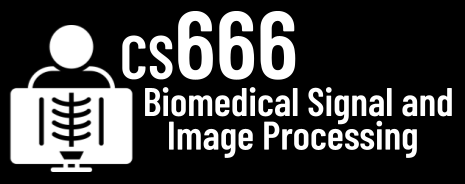

# Assignment 1

In [160]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [161]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset. Note: this might fail with an import error, but should be an easy fix :)

In [162]:
!wget "https://cs666.org/data/ecg.txt"

--2026-02-15 04:41:01--  https://cs666.org/data/ecg.txt
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105085 (103K) [text/plain]
Saving to: ‘ecg.txt.4’

ecg.txt.4           100%[===================>] 102.62K  --.-KB/s    in 0.01s   

2026-02-15 04:41:02 (7.18 MB/s) - ‘ecg.txt.4’ saved [105085/105085]



In [163]:
!pip install peakutils

In [164]:
from biosppy import storage
import matplotlib.pyplot as plt
from scipy import stats, integrate, interpolate
from scipy.ndimage import filters
import peakutils
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [165]:
SAMPLING_RATE = 0 ### TODO!
SECONDS = 0 ### TODO!

In [166]:
fs = metadata["sampling_rate"]
print("Sampling rate = ",fs, "Hz")
time = len(signal) / fs
print("time in seconds =", time)

Sampling rate =  1000.0 Hz
time in seconds = 15.0


Sampling rate = 1000.0 Hz
It lasted 15 seconds

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [167]:
### TODO

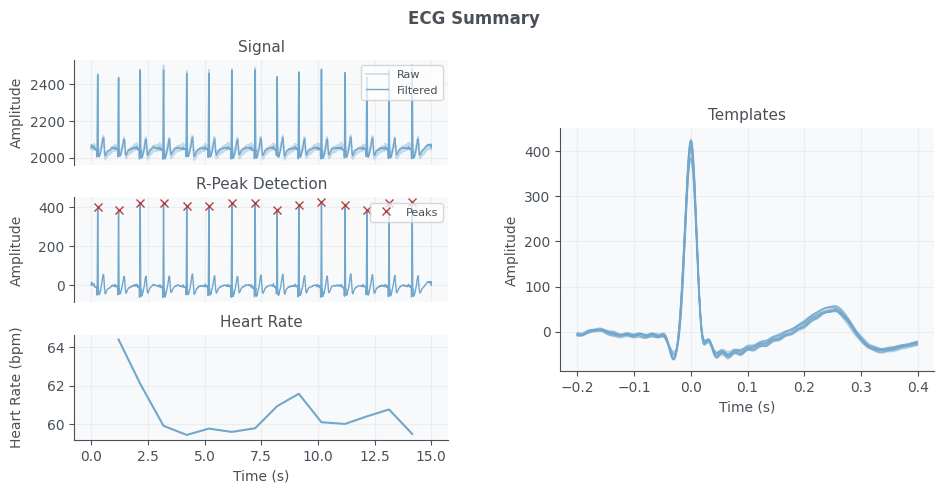

In [168]:
from biosppy.signals import ecg
fs = metadata.get("sampling_rate", None) or metadata.get("fs", None)
out = ecg.ecg(signal=signal, sampling_rate=fs, show=True)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

In [169]:
### TODO plot unfiltered signal

In [170]:
import numpy as np
samples_3s = int(3 * fs)
time = np.arange(len(signal)) / fs
time_3s = time[:samples_3s]
unfiltered = signal[:samples_3s]
filtered = out["filtered"][:samples_3s]

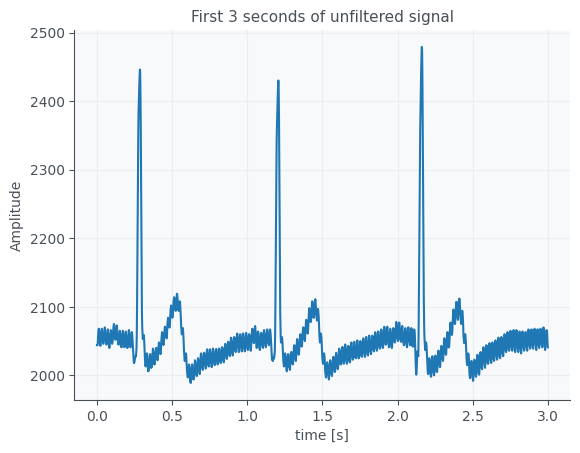

In [171]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(time_3s, unfiltered)
plt.title("First 3 seconds of unfiltered signal")
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.show()

In [172]:
### TODO plot filtered signal

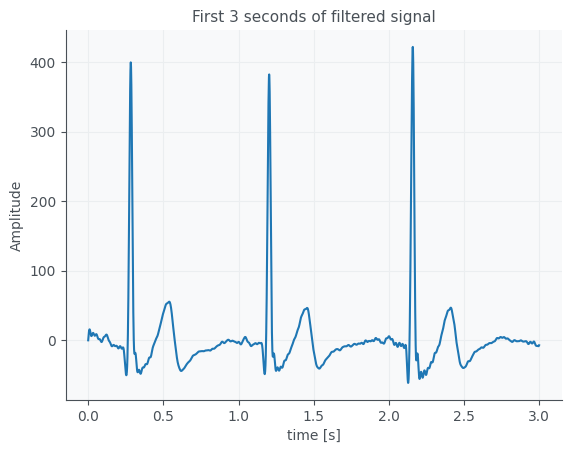

In [173]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(time_3s, filtered)
plt.title("First 3 seconds of filtered signal")
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

In [174]:
### TODO

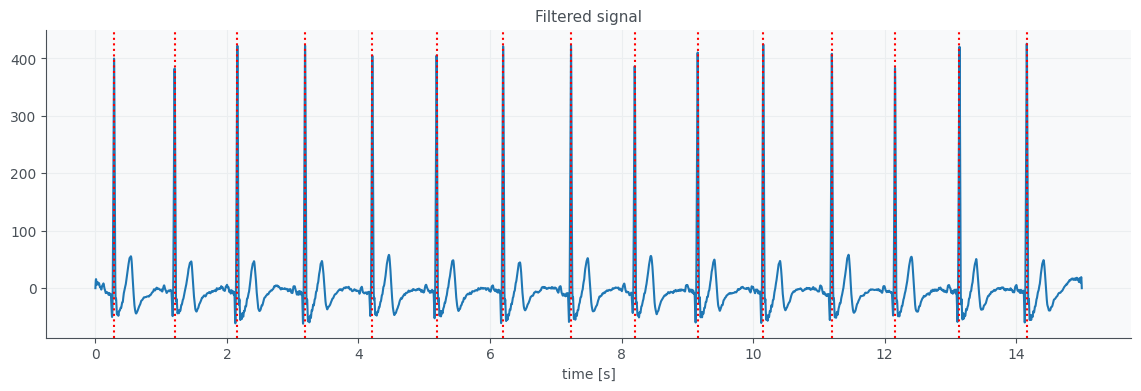

In [175]:
import numpy as np
import matplotlib.pyplot as plt
filtered = np.asarray(out["filtered"])
rpeaks = np.array(out["rpeaks"], dtype=int)
time = np.arange(len(filtered)) / fs
plt.figure(figsize=(14,4))
plt.plot(time, filtered)
for r in rpeaks:
   plt.axvline(x = r/fs, color = "r", ls=":")
plt.title("Filtered signal")
plt.xlabel("time [s]")
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [176]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [177]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

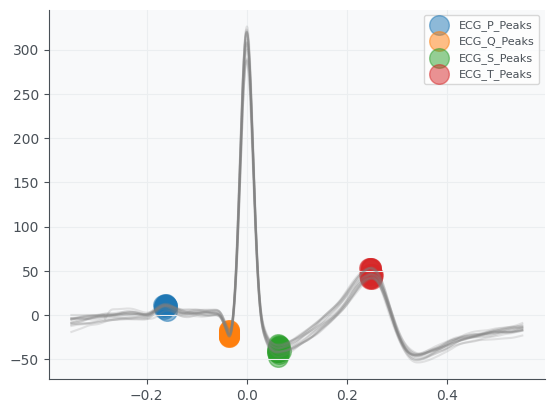

In [178]:
import neurokit2 as nk
import numpy as np
ecg_cleaned = nk.ecg_clean(signal, sampling_rate=fs)
rpeaks = out["rpeaks"]
rpeaks_nk = {"ECG_R_Peaks": np.array(rpeaks, dtype=int)}
signals_peak, waves_peak = nk.ecg_delineate(ecg_cleaned,
                                          rpeaks,
                                          sampling_rate=fs,
                                          method="peak",
                                          show=True,
                                          show_type='peaks')

In [179]:
# TODO Does the detection work well?

Yes, the detection works well.

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [180]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

In [181]:
!pip install sleepecg

In [182]:
import sleepecg
import numpy as np
ecg_raw = np.asarray(signal).astype(float)
rpeaks_sleep=sleepecg.detect_heartbeats(ecg_raw, fs)
print("sleepecg R-peaks detected:", len(rpeaks_sleep))

sleepecg R-peaks detected: 15


In [183]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!

Biosppy and sleepecg give different rpeaks.

In [184]:
np.array_equal(out["rpeaks"], rpeaks_sleep)

False

In [185]:
r_bio = np.array(out["rpeaks"])
r_sleep = np.array(rpeaks_sleep)
min_len = len(r_bio) if len(r_bio) < len(r_sleep) else len(r_sleep)
r_bio_sec = r_bio / fs
r_sleep_sec = r_sleep / fs
mse_seconds = np.mean((r_bio_sec - r_sleep_sec) ** 2)
print("MSE (seconds^2):", mse_seconds)

MSE (seconds^2): 2.0000000000013358e-07


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [186]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

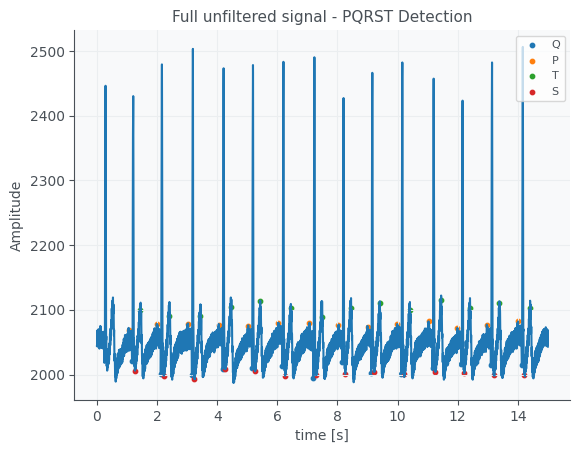

In [187]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

ecg_unfiltered = np.asarray(signal).astype(float)

_, info_unfiltered = nk.ecg_peaks(ecg_unfiltered, sampling_rate=fs)
rpeaks_unfiltered = info_unfiltered["ECG_R_Peaks"]
r_dict_unfiltered = {"ECG_R_Peaks": rpeaks_unfiltered}

_, waves_unfiltered = nk.ecg_delineate(
    ecg_cleaned=ecg_unfiltered,
    rpeaks=r_dict_unfiltered,
    sampling_rate=fs,
    method="dwt",
    show=False
)

def clean_idx(arr, n):
    arr = np.array(arr, dtype=float)
    arr = arr[~np.isnan(arr)].astype(int)
    return arr[(arr >= 0) & (arr < n)]

p_unfiltered = clean_idx(waves_unfiltered.get("ECG_P_Peaks", []), len(ecg_unfiltered))
q_unfiltered = clean_idx(waves_unfiltered.get("ECG_Q_Peaks", []), len(ecg_unfiltered))
s_unfiltered = clean_idx(waves_unfiltered.get("ECG_S_Peaks", []), len(ecg_unfiltered))
t_unfiltered = clean_idx(waves_unfiltered.get("ECG_T_Peaks", []), len(ecg_unfiltered))
r_unfiltered = np.array(rpeaks_unfiltered, dtype=int)

time = np.arange(len(ecg_unfiltered)) / fs

plt.figure()
plt.plot(time, ecg_unfiltered)
plt.scatter(q_unfiltered/fs, ecg_unfiltered[q_unfiltered], s=10, label="Q")
plt.scatter(p_unfiltered/fs, ecg_unfiltered[p_unfiltered], s=10, label="P")
plt.scatter(t_unfiltered/fs, ecg_unfiltered[t_unfiltered], s=10, label="T")
plt.scatter(s_unfiltered/fs, ecg_unfiltered[s_unfiltered], s=10, label="S")
plt.title("Full unfiltered signal - PQRST Detection")
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


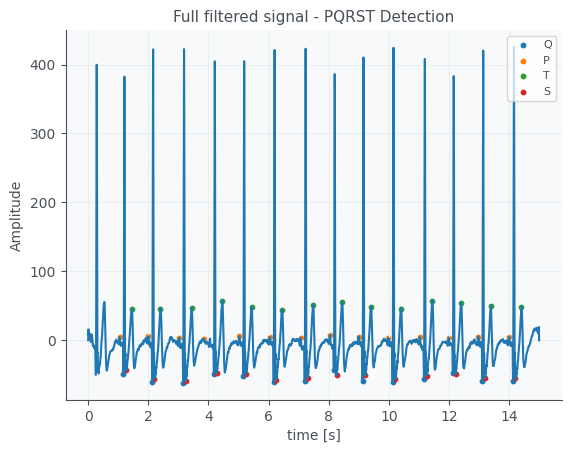

In [188]:
ecg_filtered = np.asarray(out["filtered"]).astype(float)

_, info_filtered = nk.ecg_peaks(ecg_filtered, sampling_rate=fs)
rpeaks_filtered = info_filtered["ECG_R_Peaks"]
r_dict_filtered = {"ECG_R_Peaks": rpeaks_filtered}

_, waves_filtered = nk.ecg_delineate(
    ecg_cleaned=ecg_filtered,
    rpeaks=r_dict_filtered,
    sampling_rate=fs,
    method="dwt",
    show=False
)

p_filtered = clean_idx(waves_filtered.get("ECG_P_Peaks", []), len(ecg_filtered))
q_filtered = clean_idx(waves_filtered.get("ECG_Q_Peaks", []), len(ecg_filtered))
s_filtered = clean_idx(waves_filtered.get("ECG_S_Peaks", []), len(ecg_filtered))
t_filtered = clean_idx(waves_filtered.get("ECG_T_Peaks", []), len(ecg_filtered))
r_filtered = np.array(rpeaks_filtered, dtype=int)

time = np.arange(len(ecg_filtered)) / fs

plt.figure()
plt.plot(time, ecg_filtered)
plt.scatter(q_filtered/fs, ecg_filtered[q_filtered], s=10, label="Q")
plt.scatter(p_filtered/fs, ecg_filtered[p_filtered], s=10, label="P")
plt.scatter(t_filtered/fs, ecg_filtered[t_filtered], s=10, label="T")
plt.scatter(s_filtered/fs, ecg_filtered[s_filtered], s=10, label="S")
plt.title("Full filtered signal - PQRST Detection")
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [189]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

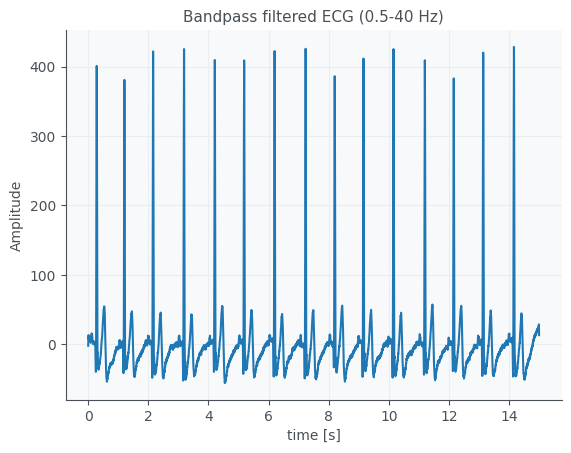

In [190]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

ecg_raw = np.asarray(signal).astype(float)

lowcut = 0.5
highcut = 40

ecg_bp = nk.signal_filter(
    ecg_raw,
    sampling_rate=fs,
    lowcut=lowcut,
    highcut=highcut,
    method="butterworth",
    order=4
)

plt.figure()
plt.plot(np.arange(len(ecg_bp))/fs, ecg_bp)
plt.title(f"Bandpass filtered ECG ({lowcut}-{highcut} Hz)")
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.show()


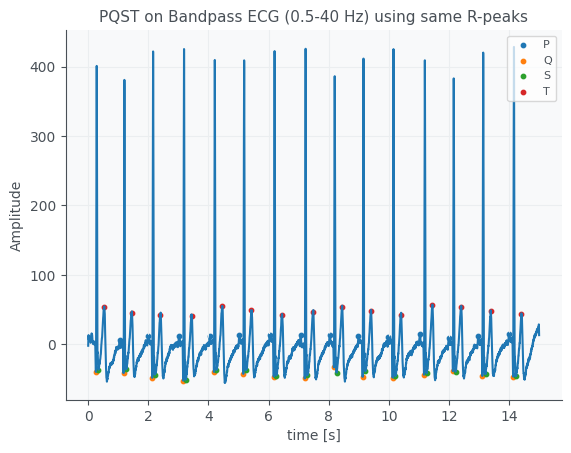

In [191]:
r = np.array(out["rpeaks"], dtype=int)
r_dict = {"ECG_R_Peaks": r}

_, waves_bp = nk.ecg_delineate(
    ecg_cleaned=ecg_bp,
    rpeaks=r_dict,
    sampling_rate=fs,
    method="dwt",
    show=False
)

def clean_idx(arr, n):
    arr = np.array(arr, dtype=float)
    arr = arr[~np.isnan(arr)].astype(int)
    return arr[(arr >= 0) & (arr < n)]

p = clean_idx(waves_bp.get("ECG_P_Peaks", []), len(ecg_bp))
q = clean_idx(waves_bp.get("ECG_Q_Peaks", []), len(ecg_bp))
s = clean_idx(waves_bp.get("ECG_S_Peaks", []), len(ecg_bp))
t = clean_idx(waves_bp.get("ECG_T_Peaks", []), len(ecg_bp))

time = np.arange(len(ecg_bp)) / fs

plt.figure()
plt.plot(time, ecg_bp)
plt.scatter(p/fs, ecg_bp[p], s=10, label="P")
plt.scatter(q/fs, ecg_bp[q], s=10, label="Q")
plt.scatter(s/fs, ecg_bp[s], s=10, label="S")
plt.scatter(t/fs, ecg_bp[t], s=10, label="T")
plt.title(f"PQST on Bandpass ECG ({lowcut}-{highcut} Hz) using same R-peaks")
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [192]:
# Finally, run the delineation on the filtered signal from BioSPPY.

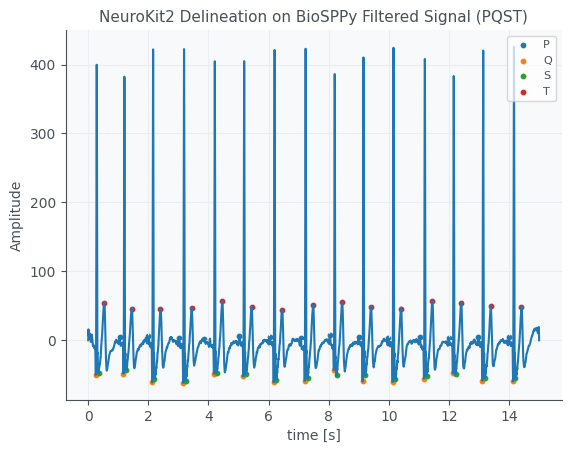

In [193]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

ecg_bio_filtered = np.asarray(out["filtered"]).astype(float)
r = np.array(out["rpeaks"], dtype=int)
r_dict = {"ECG_R_Peaks": r}

_, waves_bio = nk.ecg_delineate(
    ecg_cleaned=ecg_bio_filtered,
    rpeaks=r_dict,
    sampling_rate=fs,
    method="dwt",
    show=False
)
def clean_idx(arr, n):
    arr = np.array(arr, dtype=float)
    arr = arr[~np.isnan(arr)].astype(int)
    return arr[(arr >= 0) & (arr < n)]

p = clean_idx(waves_bio.get("ECG_P_Peaks", []), len(ecg_bio_filtered))
q = clean_idx(waves_bio.get("ECG_Q_Peaks", []), len(ecg_bio_filtered))
s = clean_idx(waves_bio.get("ECG_S_Peaks", []), len(ecg_bio_filtered))
t = clean_idx(waves_bio.get("ECG_T_Peaks", []), len(ecg_bio_filtered))

time = np.arange(len(ecg_bio_filtered)) / fs

plt.figure()
plt.plot(time, ecg_bio_filtered)
plt.scatter(p/fs, ecg_bio_filtered[p], s=10, label="P")
plt.scatter(q/fs, ecg_bio_filtered[q], s=10, label="Q")
plt.scatter(s/fs, ecg_bio_filtered[s], s=10, label="S")
plt.scatter(t/fs, ecg_bio_filtered[t], s=10, label="T")
plt.title("NeuroKit2 Delineation on BioSPPy Filtered Signal (PQST)")
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [194]:
# TODO Which one works the best?

The filtered signal works best.

In [195]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#